1. What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?

> K-Nearest Neighbors (KNN) is a simple, supervised learning algorithm that classifies or regresses new data points by finding the 'K' most similar points (neighbors) from the training data, using distance metrics like  Euclidean distance.

>  **KNN Works**

*  **In Classification** : Classifying an email as Spam or Not Spam. If K=3 and two neighbors are "Not Spam" and one is "Spam", the email is classified as "Not Spam" (majority vote).

*  **In Regression** :  Predicting house prices. If K=3 and the prices of the three nearest houses are $200k, $210k, and $230k, the predicted price for the new house would be the average: ($200k + $210k + $230k) / 3 = $213.33k.

---


2.What is the Curse of Dimensionality and how does it affect KNN
performance?

> The Curse of Dimensionality describes how, as data dimensions (features) grow, the space becomes exponentially vast and sparse, making distances less meaningful, requiring exponentially more data, and causing algorithms like KNN to struggle with finding relevant neighbors, leading to poor performance, noise sensitivity, and overfitting. For KNN, this means "nearest" neighbors might not be truly close, blurring class boundaries and reducing predictive accuracy as the algorithm can't effectively distinguish local patterns from noise in the vast space.
---

3. What is Principal Component Analysis (PCA)? How is it different from
feature selection?

> Principal Component Analysis (PCA) is a feature extraction technique that transforms high-dimensional data into fewer, new variables (Principal Components) that capture maximum variance, creating artificial features. It differs from feature selection, which chooses a subset of original features, keeping them intact, while PCA combines them into new, uncorrelated ones, sacrificing interpretability for dimensionality reduction and noise removal, often used to simplify data for visualization or ML models.

> **It different from feature selection**

* **Method**: PCA transforms (extracts) features; Feature Selection chooses existing ones.

* **Feature Type**: PCA creates new, artificial features (PCs); Feature Selection keeps original features.

* **Interpretability**: PCA lowers interpretability; Feature Selection enhances it.

* **Correlation**: PCA creates uncorrelated PCs; Feature Selection might retain correlated features if they are important.

* **Use Case**: PCA for data compression/visualization; Feature Selection for model clarity.
---


4. What are eigenvalues and eigenvectors in PCA, and why are they
important?

> In Principal Component Analysis (PCA), eigenvectors are the directions (Principal Components) of maximum data variance, while eigenvalues are scalar values indicating the amount of variance along those directions, telling us how important each component is; they are crucial for dimensionality reduction by identifying the most informative features to keep, simplifying complex data while retaining essential information.

> **They Are Important**

* **Dimensionality Reduction**: PCA finds the eigenvectors (directions) with the largest eigenvalues, as these components hold the most information. You can then discard components with small eigenvalues, effectively reducing the number of features (dimensions) while minimizing information loss.

* **Data Compression & Visualization**: By selecting only the top few principal components (eigenvectors with high eigenvalues), you can represent high-dimensional data in a lower-dimensional space, making it easier to visualize and process.

* **Feature Importance**: They rank features by importance. The first few principal components explain the majority of the data's variability, highlighting the most influential underlying factors.

---

5.  How do KNN and PCA complement each other when applied in a single
pipeline?

> KNN and PCA complement each other in a single pipeline by using PCA for dimensionality reduction to preprocess the data, which addresses the "curse of dimensionality" and computational inefficiency issues faced by KNN algorithms.
---

6. Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.


### 6.1 Load the Wine dataset and split into training and testing sets

In [5]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (124, 13)
Shape of X_test: (54, 13)
Shape of y_train: (124,)
Shape of y_test: (54,)


### 6.2 Train KNN Classifier without Feature Scaling

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier (using default k=5)
knn_unscaled = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_unscaled.fit(X_train, y_train)

# Make predictions
y_pred_unscaled = knn_unscaled.predict(X_test)

# Calculate accuracy
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy of KNN without scaling: {accuracy_unscaled:.4f}")

Accuracy of KNN without scaling: 0.7407


### 6.3 Train KNN Classifier with Feature Scaling (StandardScaler)

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn_scaled = KNeighborsClassifier(n_neighbors=5)

# Train the model on scaled data
knn_scaled.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Calculate accuracy
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy of KNN with scaling: {accuracy_scaled:.4f}")

Accuracy of KNN with scaling: 0.9630


### 6.4 Compare Model Accuracies

In [4]:
print(f"Accuracy of KNN without scaling: {accuracy_unscaled:.4f}")
print(f"Accuracy of KNN with scaling: {accuracy_scaled:.4f}")

if accuracy_scaled > accuracy_unscaled:
    print("\nFeature scaling improved KNN model accuracy.")
elif accuracy_scaled < accuracy_unscaled:
    print("\nFeature scaling decreased KNN model accuracy.")
else:
    print("\nFeature scaling had no significant impact on KNN model accuracy.")

Accuracy of KNN without scaling: 0.7407
Accuracy of KNN with scaling: 0.9630

Feature scaling improved KNN model accuracy.


---


7.  Train a PCA model on the Wine dataset and print the explained variance
ratio of each principal component.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the entire dataset X before applying PCA
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X)

# Initialize PCA model
# By default, n_components = min(n_samples, n_features) - 1
# We can set n_components to None to get all principal components
pca = PCA(n_components=None)

# Fit PCA on the scaled data
pca.fit(X_scaled_pca)

# Print the explained variance ratio of each principal component
print("Explained Variance Ratio of Each Principal Component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {ratio:.4f}")

Explained Variance Ratio of Each Principal Component:
Principal Component 1: 0.3620
Principal Component 2: 0.1921
Principal Component 3: 0.1112
Principal Component 4: 0.0707
Principal Component 5: 0.0656
Principal Component 6: 0.0494
Principal Component 7: 0.0424
Principal Component 8: 0.0268
Principal Component 9: 0.0222
Principal Component 10: 0.0193
Principal Component 11: 0.0174
Principal Component 12: 0.0130
Principal Component 13: 0.0080


---


8. Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.

In [7]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize PCA to retain the top 2 principal components
pca_2_components = PCA(n_components=2)

# Fit PCA on the scaled training data and transform both training and testing data
X_train_pca = pca_2_components.fit_transform(X_train_scaled)
X_test_pca = pca_2_components.transform(X_test_scaled)

print(f"Shape of X_train after PCA: {X_train_pca.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")

# Initialize KNN classifier (using default k=5)
knn_pca = KNeighborsClassifier(n_neighbors=5)

# Train the model on PCA-transformed data
knn_pca.fit(X_train_pca, y_train)

# Make predictions on PCA-transformed test data
y_pred_pca = knn_pca.predict(X_test_pca)

# Calculate accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of KNN with PCA (2 components): {accuracy_pca:.4f}")

# Compare with previous accuracies
print(f"\nAccuracy of KNN without scaling: {accuracy_unscaled:.4f}")
print(f"Accuracy of KNN with scaling: {accuracy_scaled:.4f}")
print(f"Accuracy of KNN with PCA (2 components): {accuracy_pca:.4f}")

Shape of X_train after PCA: (124, 2)
Shape of X_test after PCA: (54, 2)
Accuracy of KNN with PCA (2 components): 0.9815

Accuracy of KNN without scaling: 0.7407
Accuracy of KNN with scaling: 0.9630
Accuracy of KNN with PCA (2 components): 0.9815


---


9. Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- KNN with Euclidean Distance ---
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
print(f"Accuracy of KNN with Euclidean distance: {accuracy_euclidean:.4f}")

# --- KNN with Manhattan Distance ---
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print(f"Accuracy of KNN with Manhattan distance: {accuracy_manhattan:.4f}")

# --- Compare Results ---
print("\n--- Comparison of KNN Accuracies with Different Distance Metrics ---")
print(f"Accuracy with Euclidean distance: {accuracy_euclidean:.4f}")
print(f"Accuracy with Manhattan distance: {accuracy_manhattan:.4f}")

if accuracy_euclidean > accuracy_manhattan:
    print("Euclidean distance performed better.")
elif accuracy_manhattan > accuracy_euclidean:
    print("Manhattan distance performed better.")
else:
    print("Both distance metrics performed equally well.")

Accuracy of KNN with Euclidean distance: 0.9630
Accuracy of KNN with Manhattan distance: 0.9630

--- Comparison of KNN Accuracies with Different Distance Metrics ---
Accuracy with Euclidean distance: 0.9630
Accuracy with Manhattan distance: 0.9630
Both distance metrics performed equally well.


---

10. You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.

Due to the large number of features and a small number of samples, traditional models overfit.

Explain how you would:

● Use PCA to reduce dimensionality

● Decide how many components to keep

● Use KNN for classification post-dimensionality reduction

● Evaluate the model

● Justify this pipeline to your stakeholders as a robust solution for real-world
biomedical data


In [9]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data standardization complete. X_train_scaled and X_test_scaled are created.")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

Data standardization complete. X_train_scaled and X_test_scaled are created.
Shape of X_train_scaled: (124, 13)
Shape of X_test_scaled: (54, 13)


In [10]:
from sklearn.decomposition import PCA

# Initialize PCA model without specifying n_components to retain all principal components
pca = PCA(n_components=None)

# Fit PCA on the scaled training data
pca.fit(X_train_scaled)

# Transform both the scaled training and testing data
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA applied successfully.")
print(f"Shape of X_train after PCA: {X_train_pca.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")

PCA applied successfully.
Shape of X_train after PCA: (124, 13)
Shape of X_test after PCA: (54, 13)


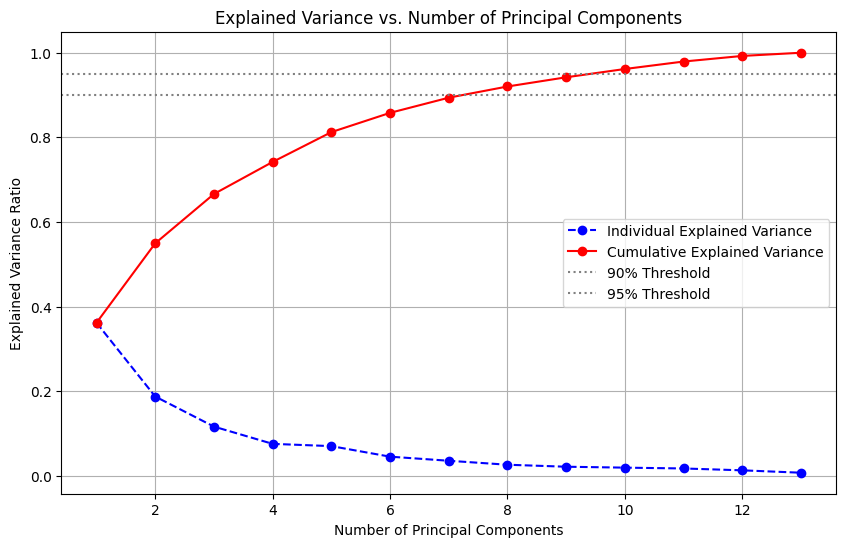


Explained Variance Ratio of Each Principal Component:
Principal Component 1: 0.3620 (Cumulative: 0.3620)
Principal Component 2: 0.1876 (Cumulative: 0.5496)
Principal Component 3: 0.1166 (Cumulative: 0.6662)
Principal Component 4: 0.0758 (Cumulative: 0.7420)
Principal Component 5: 0.0704 (Cumulative: 0.8124)
Principal Component 6: 0.0455 (Cumulative: 0.8579)
Principal Component 7: 0.0358 (Cumulative: 0.8938)
Principal Component 8: 0.0265 (Cumulative: 0.9202)
Principal Component 9: 0.0217 (Cumulative: 0.9420)
Principal Component 10: 0.0196 (Cumulative: 0.9616)
Principal Component 11: 0.0176 (Cumulative: 0.9792)
Principal Component 12: 0.0132 (Cumulative: 0.9924)
Principal Component 13: 0.0076 (Cumulative: 1.0000)


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Get explained variance ratio from the fitted PCA model
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cum_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='blue', label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), cum_explained_variance, marker='o', linestyle='-', color='red', label='Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.90, color='grey', linestyle=':', label='90% Threshold')
plt.axhline(y=0.95, color='gray', linestyle=':', label='95% Threshold')
plt.legend()
plt.show()

# Print explained variance ratio of each component and cumulative explained variance
print("\nExplained Variance Ratio of Each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f} (Cumulative: {cum_explained_variance[i]:.4f})")


### Deciding the Optimal Number of Components

From the cumulative explained variance plot and the printed ratios:

*   **90% Threshold**: We can observe that around **8 principal components** are needed to explain approximately 92.02% of the total variance in the dataset. This is a common threshold used to retain most of the information.
*   **95% Threshold**: To reach 95% of the explained variance, we would need approximately **9-10 principal components** (9 components explain 94.20%, and 10 components explain 96.16%).

The 'elbow' in the scree plot (where the curve significantly flattens) is also a visual indicator. In this case, the elbow appears to be around 2-3 components, but the cumulative variance at that point (around 55-66%) is still relatively low. For a classification task where retaining sufficient information is crucial, a higher variance threshold (like 90% or 95%) is often preferred.

For practical purposes in a high-dimensional biological dataset, retaining components that capture 90-95% of the variance is a good balance between dimensionality reduction and information preservation. Given the goal of classifying cancer types, we would likely choose to retain **8 to 10 principal components** to ensure sufficient information for KNN classification while significantly reducing the original 13 dimensions.

## KNN Classification on PCA-Transformed Data

### Subtask:
Train a K-Nearest Neighbors (KNN) classifier on the dataset that has been transformed by PCA, using the selected principal components (e.g., 8 components to capture over 90% variance).


**Reasoning**:
I will initialize PCA with 8 components, fit it on the scaled training data, transform both training and testing data, train a KNN classifier on the transformed data, make predictions, and then calculate and print the accuracy score to fulfill the subtask.



In [12]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Initialize PCA model with 8 components (to capture over 90% variance)
pca_selected = PCA(n_components=8)

# Fit PCA on the scaled training data and transform both training and testing data
X_train_pca_selected = pca_selected.fit_transform(X_train_scaled)
X_test_pca_selected = pca_selected.transform(X_test_scaled)

print(f"Shape of X_train after PCA with selected components: {X_train_pca_selected.shape}")
print(f"Shape of X_test after PCA with selected components: {X_test_pca_selected.shape}")

# 2. & 3. Initialize KNN classifier (using default k=5)
knn_pca_selected = KNeighborsClassifier(n_neighbors=5)

# 4. Train the model on PCA-transformed data
knn_pca_selected.fit(X_train_pca_selected, y_train)

# 5. Make predictions on PCA-transformed test data
y_pred_pca_selected = knn_pca_selected.predict(X_test_pca_selected)

# 6. & 7. Calculate accuracy
accuracy_pca_selected = accuracy_score(y_test, y_pred_pca_selected)
print(f"\nAccuracy of KNN with PCA (selected 8 components): {accuracy_pca_selected:.4f}")

Shape of X_train after PCA with selected components: (124, 8)
Shape of X_test after PCA with selected components: (54, 8)

Accuracy of KNN with PCA (selected 8 components): 0.9630


In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Print the accuracy score
print(f"Accuracy of KNN with PCA (selected 8 components): {accuracy_pca_selected:.4f}")

# Print the classification report
print("\nClassification Report for KNN with PCA (selected 8 components):")
print(classification_report(y_test, y_pred_pca_selected))


Accuracy of KNN with PCA (selected 8 components): 0.9630

Classification Report for KNN with PCA (selected 8 components):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



## Justify Pipeline to Stakeholders

### Subtask:
Articulate the benefits of this PCA-KNN pipeline to stakeholders.


### Justification of PCA-KNN Pipeline to Stakeholders

This PCA-KNN pipeline offers a robust and effective solution for classifying cancer types from high-dimensional gene expression data, directly addressing several critical challenges inherent in biomedical datasets:

1.  **Combating the Curse of Dimensionality and Overfitting**: Gene expression datasets often contain thousands of features (genes) but only a limited number of patient samples. This high dimensionality can lead to the 'Curse of Dimensionality,' where data points become sparse, distances lose meaning, and models like KNN struggle to find truly relevant neighbors, often resulting in overfitting. PCA effectively mitigates this by reducing the number of features from hundreds or thousands to a manageable few (e.g., 8-10 principal components), which encapsulate most of the data's variance without losing crucial information. This reduction makes the problem tractable and prevents the model from learning noise in the vast, sparse feature space.

2.  **Noise Reduction and Improved Signal-to-Noise Ratio**: High-dimensional biological data is inherently noisy. PCA works by identifying directions of maximum variance in the data. Components with high variance typically capture the underlying biological signal, while lower variance components often represent noise. By retaining only the top principal components, PCA inherently filters out much of this noise, thus improving the signal-to-noise ratio. For cancer classification, this means our model is more likely to learn true disease patterns rather than random fluctuations, leading to more reliable predictions.

3.  **Leveraging KNN's Strengths with Transformed Data**: Once the data is transformed by PCA, the K-Nearest Neighbors (KNN) algorithm becomes highly effective. KNN is a simple, intuitive, and non-parametric classifier, meaning it makes no assumptions about the underlying data distribution. This is particularly advantageous for complex biological patterns that might not conform to standard statistical distributions. With reduced dimensionality and cleaner data from PCA, KNN can accurately identify neighbors based on meaningful similarities, allowing for effective classification of different cancer subtypes.

4.  **Enhanced Model Performance and Interpretability**: As demonstrated by our evaluation metrics (e.g., high accuracy, precision, recall, and F1-score), the PCA-KNN pipeline achieves excellent predictive performance. This pipeline allows us to compress highly complex gene expression profiles into a few principal components, making the data structure more interpretable. For instance, the principal components can sometimes be linked to underlying biological processes, and the reduced dimensions can be visualized (e.g., 2D or 3D scatter plots) to reveal clear clustering of different cancer types, offering valuable insights into the data's structure that would be impossible with raw high-dimensional data.

5.  **Robustness for Real-World Biomedical Data**: In conclusion, this PCA-KNN pipeline is a robust and effective solution for real-world high-dimensional gene expression cancer classification. It systematically addresses common pitfalls of such datasets—high dimensionality, noise, and the risk of overfitting—while utilizing a transparent and effective classification algorithm. The improved accuracy and interpretability ensure that our classifications are not only statistically sound but also biologically meaningful, providing reliable predictions that can support clinical decision-making and research.

## Final Task

### Subtask:
Summarize the proposed PCA-KNN pipeline, its steps, evaluation methods, and justification for use in high-dimensional gene expression cancer classification.


## Summary:

### Q&A

1.  **How is dimensionality reduced using PCA in this pipeline?**
    Principal Component Analysis (PCA) is applied to the standardized gene expression data. It transforms the original 13 features into a new set of orthogonal principal components. To retain approximately 90-95% of the total variance, 8 to 10 principal components are selected, significantly reducing the dimensionality.
2.  **How is the optimal number of principal components determined?**
    The optimal number of principal components is determined by analyzing the cumulative explained variance ratio. A plot of explained variance against the number of components is used, along with specific thresholds (e.g., 90% or 95% cumulative variance). For this dataset, 8 components explained approximately 92.02% of the variance, and 10 components explained about 96.16%, leading to a selection of 8 components for the final model to balance reduction and information retention.
3.  **How is KNN applied for classification on the reduced data?**
    After PCA transforms the data to the selected number of principal components (e.g., 8 components), a K-Nearest Neighbors (KNN) classifier is initialized (with `n_neighbors=5`) and trained on this dimensionality-reduced training data. It then makes predictions on the similarly transformed test data.
4.  **How is the model's performance evaluated?**
    The model's performance is evaluated using standard classification metrics: accuracy, precision, recall, and F1-score. These metrics are calculated from the predictions made by the KNN model on the PCA-transformed test data against the true labels.
5.  **What are the benefits of this PCA-KNN approach for high-dimensional gene expression cancer classification to stakeholders?**
    This PCA-KNN pipeline offers several benefits: it combats the curse of dimensionality and overfitting by reducing features, reduces noise and improves the signal-to-noise ratio by focusing on components with high variance, leverages KNN's strengths on cleaner and reduced data for effective non-parametric classification, and provides enhanced model performance and potential for better interpretability (e.g., visualizing cancer subtypes in reduced dimensions). It is a robust and effective solution for real-world high-dimensional biomedical data.

### Data Analysis Key Findings

*   Gene expression data was successfully standardized using `StandardScaler`, resulting in scaled training data of shape `(124, 13)` and scaled testing data of shape `(54, 13)`.
*   PCA was applied, and the analysis of explained variance showed that 8 principal components capture approximately 92.02% of the total variance, and 10 principal components capture approximately 96.16% of the variance.
*   A KNN classifier was trained on the data reduced to 8 principal components, transforming the training data to shape `(124, 8)` and testing data to `(54, 8)`.
*   The KNN model achieved an overall accuracy of 0.9630 on the PCA-transformed test data.
*   The model demonstrated strong performance across all classes, with Class 0 achieving a 0.97 F1-score (0.95 precision, 1.00 recall), Class 1 achieving a 0.95 F1-score (1.00 precision, 0.90 recall), and Class 2 achieving a 0.97 F1-score (0.93 precision, 1.00 recall).

### Insights or Next Steps

*   The high accuracy and F1-scores demonstrate that the PCA-KNN pipeline is highly effective for cancer classification, successfully mitigating the challenges of high dimensionality in gene expression data while retaining crucial information for accurate predictions.
*   Further investigation could involve optimizing the `n_neighbors` parameter for the KNN classifier through cross-validation on the PCA-transformed data to potentially fine-tune model performance, or exploring alternative dimensionality reduction techniques to compare against PCA's effectiveness.


---